In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab 
%matplotlib inline
import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (c:\Users\nbounas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\fixes.py)

In [3]:
df = pd.read_csv(r'C:\\Users\\nbounas\\Downloads\\framingham_preproc.csv')
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3745,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3746,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3747,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [4]:
# we can drop education as it doesnt effect heart disease
#df = df.drop(['education'], axis=1)
# df = df[['male','prevalentHyp', 'totChol', 'currentSmoker', 'diaBP', 'sysBP', 'age', 'TenYearCHD']]

In [5]:
df.to_csv(r'C:\Users\nbounas\Desktop\framingham_preproc.csv', index=False)

In [6]:
print(df.isnull().sum().sum())
df=df.dropna()
print(df.isnull().sum().sum())
df.shape

0
0


(3749, 15)

In [7]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

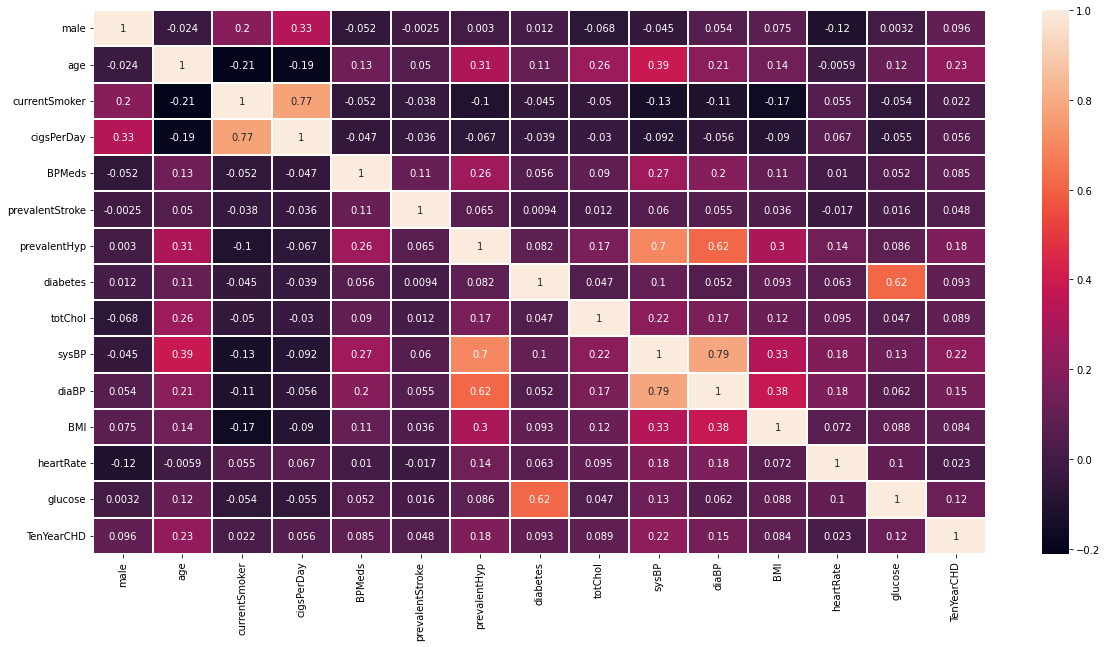

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.1,annot=True)
# linewidths is white space between boxes and annot gives value
plt.show()

In [9]:
df.to_csv(r'C:\\Users\\nbounas\\Desktop\\my_data.csv', index=False)

In [10]:
X = df.drop('TenYearCHD',1)
y = df.TenYearCHD

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)

In [1]:
#Using SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(0.8)
X_ros, y_ros = smote.fit_resample(X_train, y_train)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (c:\Users\nbounas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\fixes.py)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Accuracy with Logistic Regression: accuracy score: 84.53%
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       632
           1       0.67      0.03      0.06       118

    accuracy                           0.85       750
   macro avg       0.76      0.52      0.49       750
weighted avg       0.82      0.85      0.78       750



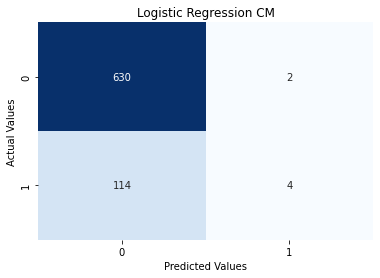

array([[630,   2],
       [114,   4]], dtype=int64)

In [14]:

from sklearn.linear_model import LogisticRegression
skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=10)
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2', solver='liblinear')
scorer = make_scorer(average_precision_score)
result = cross_val_score(log_reg_classifier, X, y, cv = skfold, scoring=scorer)
log_reg_classifier.fit(X_train, y_train)
y_pred_log=log_reg_classifier.predict(X_test)
my_confusion_matrix(y_test, y_pred_log, 'Logistic Regression CM', 'Accuracy with Logistic Regression:')

In [15]:
# #from sklearn.linear_model import DecisionTreeClassifier
# skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=10)
# DecisionTreeClassifier=DecisionTreeClassifier()
# scorer = make_scorer(average_precision_score)
# result = cross_val_score(log_reg_classifier, X, y, cv = skfold, scoring=scorer)
# DecisionTreeClassifier.fit(X_ros, y_ros)
# y_pred_log=DecisionTreeClassifier.predict(X_test)
# my_confusion_matrix(y_test, y_pred_log, 'DecisionTreeClassifier CM', 'Accuracy with Logistic Regression:')

<!--  -->

In [16]:
# #from sklearn.linear_model import DecisionTreeClassifier
# skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=10)
# SVM=SVC()
# scorer = make_scorer(average_precision_score)
# result = cross_val_score(log_reg_classifier, X, y, cv = skfold, scoring=scorer)
# SVM.fit(X_ros, y_ros)
# y_pred_log=SVM.predict(X_test)
# my_confusion_matrix(y_test, y_pred_log, 'SVM CM', 'Accuracy with nSVM:')

In [17]:
classifiers = {
    "LogisticRegression": LogisticRegression(C= 0.1, penalty= 'l2', random_state= 40, solver='liblinear'),
    "LGBMClassifier": LGBMClassifier(n_estimators = 100, reg_alpha = 0.2, reg_lambda = 0.1, random_state=10 ),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(20),    
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators = 1000, random_state = 1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB(),
    "SVMClassification": SVC(C = 0.2, gamma = 0.01),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, random_state=7),
    "SGDClassifier": SGDClassifier(loss='modified_huber', shuffle=True, random_state= 1)
}

In [19]:

from numpy import mean
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])

for key in classifiers:

    print('*',key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(X_train, y_train)
    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100


    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    row = {'model': key,
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }
    df_result = df_result.append(row, ignore_index=True)






* LogisticRegression
{'fit_time': array([0.03537154, 0.02430153, 0.0628953 ]), 'score_time': array([0.00399899, 0.00903177, 0.00700712]), 'test_accuracy': array([0.8528    , 0.8456    , 0.85028022]), 'test_recall': array([0.04712042, 0.03141361, 0.03684211]), 'test_precision': array([0.81818182, 0.42857143, 0.63636364])}
* LGBMClassifier
{'fit_time': array([0.25886726, 0.17569661, 0.1950388 ]), 'score_time': array([0.01364708, 0.01063013, 0.01265192]), 'test_accuracy': array([0.8296   , 0.84     , 0.8438751]), 'test_recall': array([0.06806283, 0.11518325, 0.13157895]), 'test_precision': array([0.27083333, 0.41509434, 0.45454545])}
* XGBClassifier
[22:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:25] WARNING: C:/Users/Admini

In [20]:
df_result.sort_values(by='recall', ascending=False)

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
4,DecisionTreeClassifier,29,545,87,89,574,176,0.765,0.25,0.246,0.248,0.554,0.18
8,GaussianNB,22,590,42,96,612,138,0.816,0.344,0.186,0.242,0.56,0.192
2,XGBClassifier,15,608,24,103,623,127,0.831,0.385,0.127,0.191,0.545,0.186
1,LGBMClassifier,11,611,21,107,622,128,0.829,0.344,0.093,0.147,0.53,0.175
6,AdaBoostClassifier,8,617,15,110,625,125,0.833,0.348,0.068,0.113,0.522,0.17
5,RandomForestClassifier,7,625,7,111,632,118,0.843,0.5,0.059,0.106,0.524,0.178
7,GradientBoostingClassifier,7,621,11,111,628,122,0.837,0.389,0.059,0.103,0.521,0.171
0,LogisticRegression,4,630,2,114,634,116,0.845,0.667,0.034,0.065,0.515,0.175
10,MLPClassifier,3,631,1,115,634,116,0.845,0.75,0.025,0.049,0.512,0.172
3,KNeighborsClassifier,2,629,3,116,631,119,0.841,0.4,0.017,0.033,0.506,0.161
